In [1]:
folder = "drive/My Drive/Colab Notebooks/KOI_Data/"
folder = "../../KOI_Data/"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

#df_sets = pd.read_csv(folder+"/koi_sets_unb.csv")
#mask_train = (df_sets["Set"] == "Train").values
#mask_test = (df_sets["Set"] == "Test").values
#mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
#df_meta_train = df_meta[mask_train]
#df_meta_test = df_meta[mask_test]
#df_meta_unb = df_meta[mask_unlabeled]

df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
4,K00958.01,CANDIDATE,NaN,21.761298,166.540438,2454999.540,0.123,1.24300,1300.7,0.032,...,4859.0,4.612,0.00,0.720,0.781,19.204,96.205,60.0,1,62


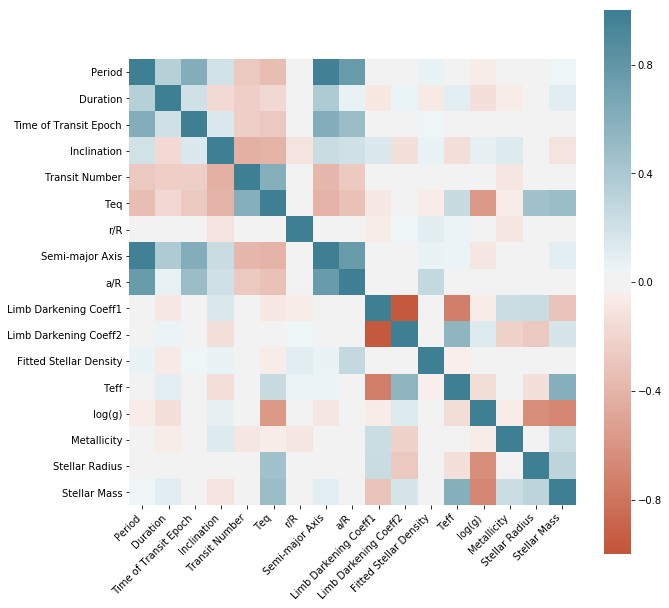

,Period,Duration,Time of Transit Epoch,Inclination,Transit Number,Teq,r/R,Semi-major Axis,a/R,Limb Darkening Coeff1,Limb Darkening Coeff2,Fitted Stellar Density,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass
Period,1.000000,0.348810,0.616285,0.189294,-0.277104,-0.349195,-0.026161,0.971533,0.755188,-0.009711,0.003053,0.064893,0.023837,-0.050684,-0.002926,0.014064,0.041244
Duration,0.348810,1.000000,0.203726,-0.178945,-0.245439,-0.183515,0.035369,0.384052,0.076290,-0.082972,0.060367,-0.075386,0.107138,-0.133995,-0.047908,0.014316,0.112765
Time of Transit Epoch,0.616285,0.203726,1.000000,0.142303,-0.233885,-0.272567,0.009635,0.614260,0.492089,0.016486,-0.016776,0.042365,-0.004600,0.007528,0.019106,-0.002905,-0.003894
Inclination,0.189294,-0.178945,0.142303,1.000000,-0.433940,-0.404930,-0.111479,0.243225,0.207470,0.147784,-0.120093,0.066215,-0.141013,0.078705,0.129882,-0.015347,-0.114022
Transit Number,-0.277104,-0.245439,-0.233885,-0.433940,1.000000,0.606480,-0.029710,-0.373006,-0.263693,-0.022144,0.012807,-0.021890,0.018030,-0.006694,-0.097337,0.016362,0.005914
Teq,-0.349195,-0.183515,-0.272567,-0.404930,0.606480,1.000000,0.032479,-0.420240,-0.323095,-0.082827,-0.000963,-0.048180,0.254624,-0.575608,-0.057335,0.457761,0.491178
r/R,-0.026161,0.035369,0.009635,-0.111479,-0.029710,0.032479,1.000000,-0.026587,-0.007013,-0.056983,0.045485,0.116456,0.050584,-0.016942,-0.093983,-0.002065,0.014568
Semi-major Axis,0.971533,0.384052,0.614260,0.243225,-0.373006,-0.420240,-0.026587,1.000000,0.754924,-0.019488,0.008950,0.067044,0.051510,-0.095252,0.033435,0.029639,0.102179
a/R,0.755188,0.076290,0.492089,0.207470,-0.263693,-0.323095,-0.007013,0.754924,1.000000,0.035632,-0.030894,0.278822,-0.032806,-0.025830,0.013422,0.011134,0.009140
Limb Darkening Coeff1,-0.009711,-0.082972,0.016486,0.147784,-0.022144,-0.082827,-0.056983,-0.019488,0.035632,1.000000,-0.966637,0.022754,-0.729530,-0.055646,0.241358,0.244282,-0.302067


In [8]:
metadata_used = ["Period", "Duration", "Time of Transit Epoch", 
                 "Inclination", "Transit Number",
                 "Teq", "r/R", "Semi-major Axis", "a/R",
                 "Limb Darkening Coeff1", "Limb Darkening Coeff2", "Fitted Stellar Density",
                "Teff","Stellar Radius", "Stellar Mass"]
df_meta_obj = df_meta[metadata_used]

df_meta_obj = impute_on_pandas(df_meta_obj)
corr = df_meta_obj.corr()


plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

corr


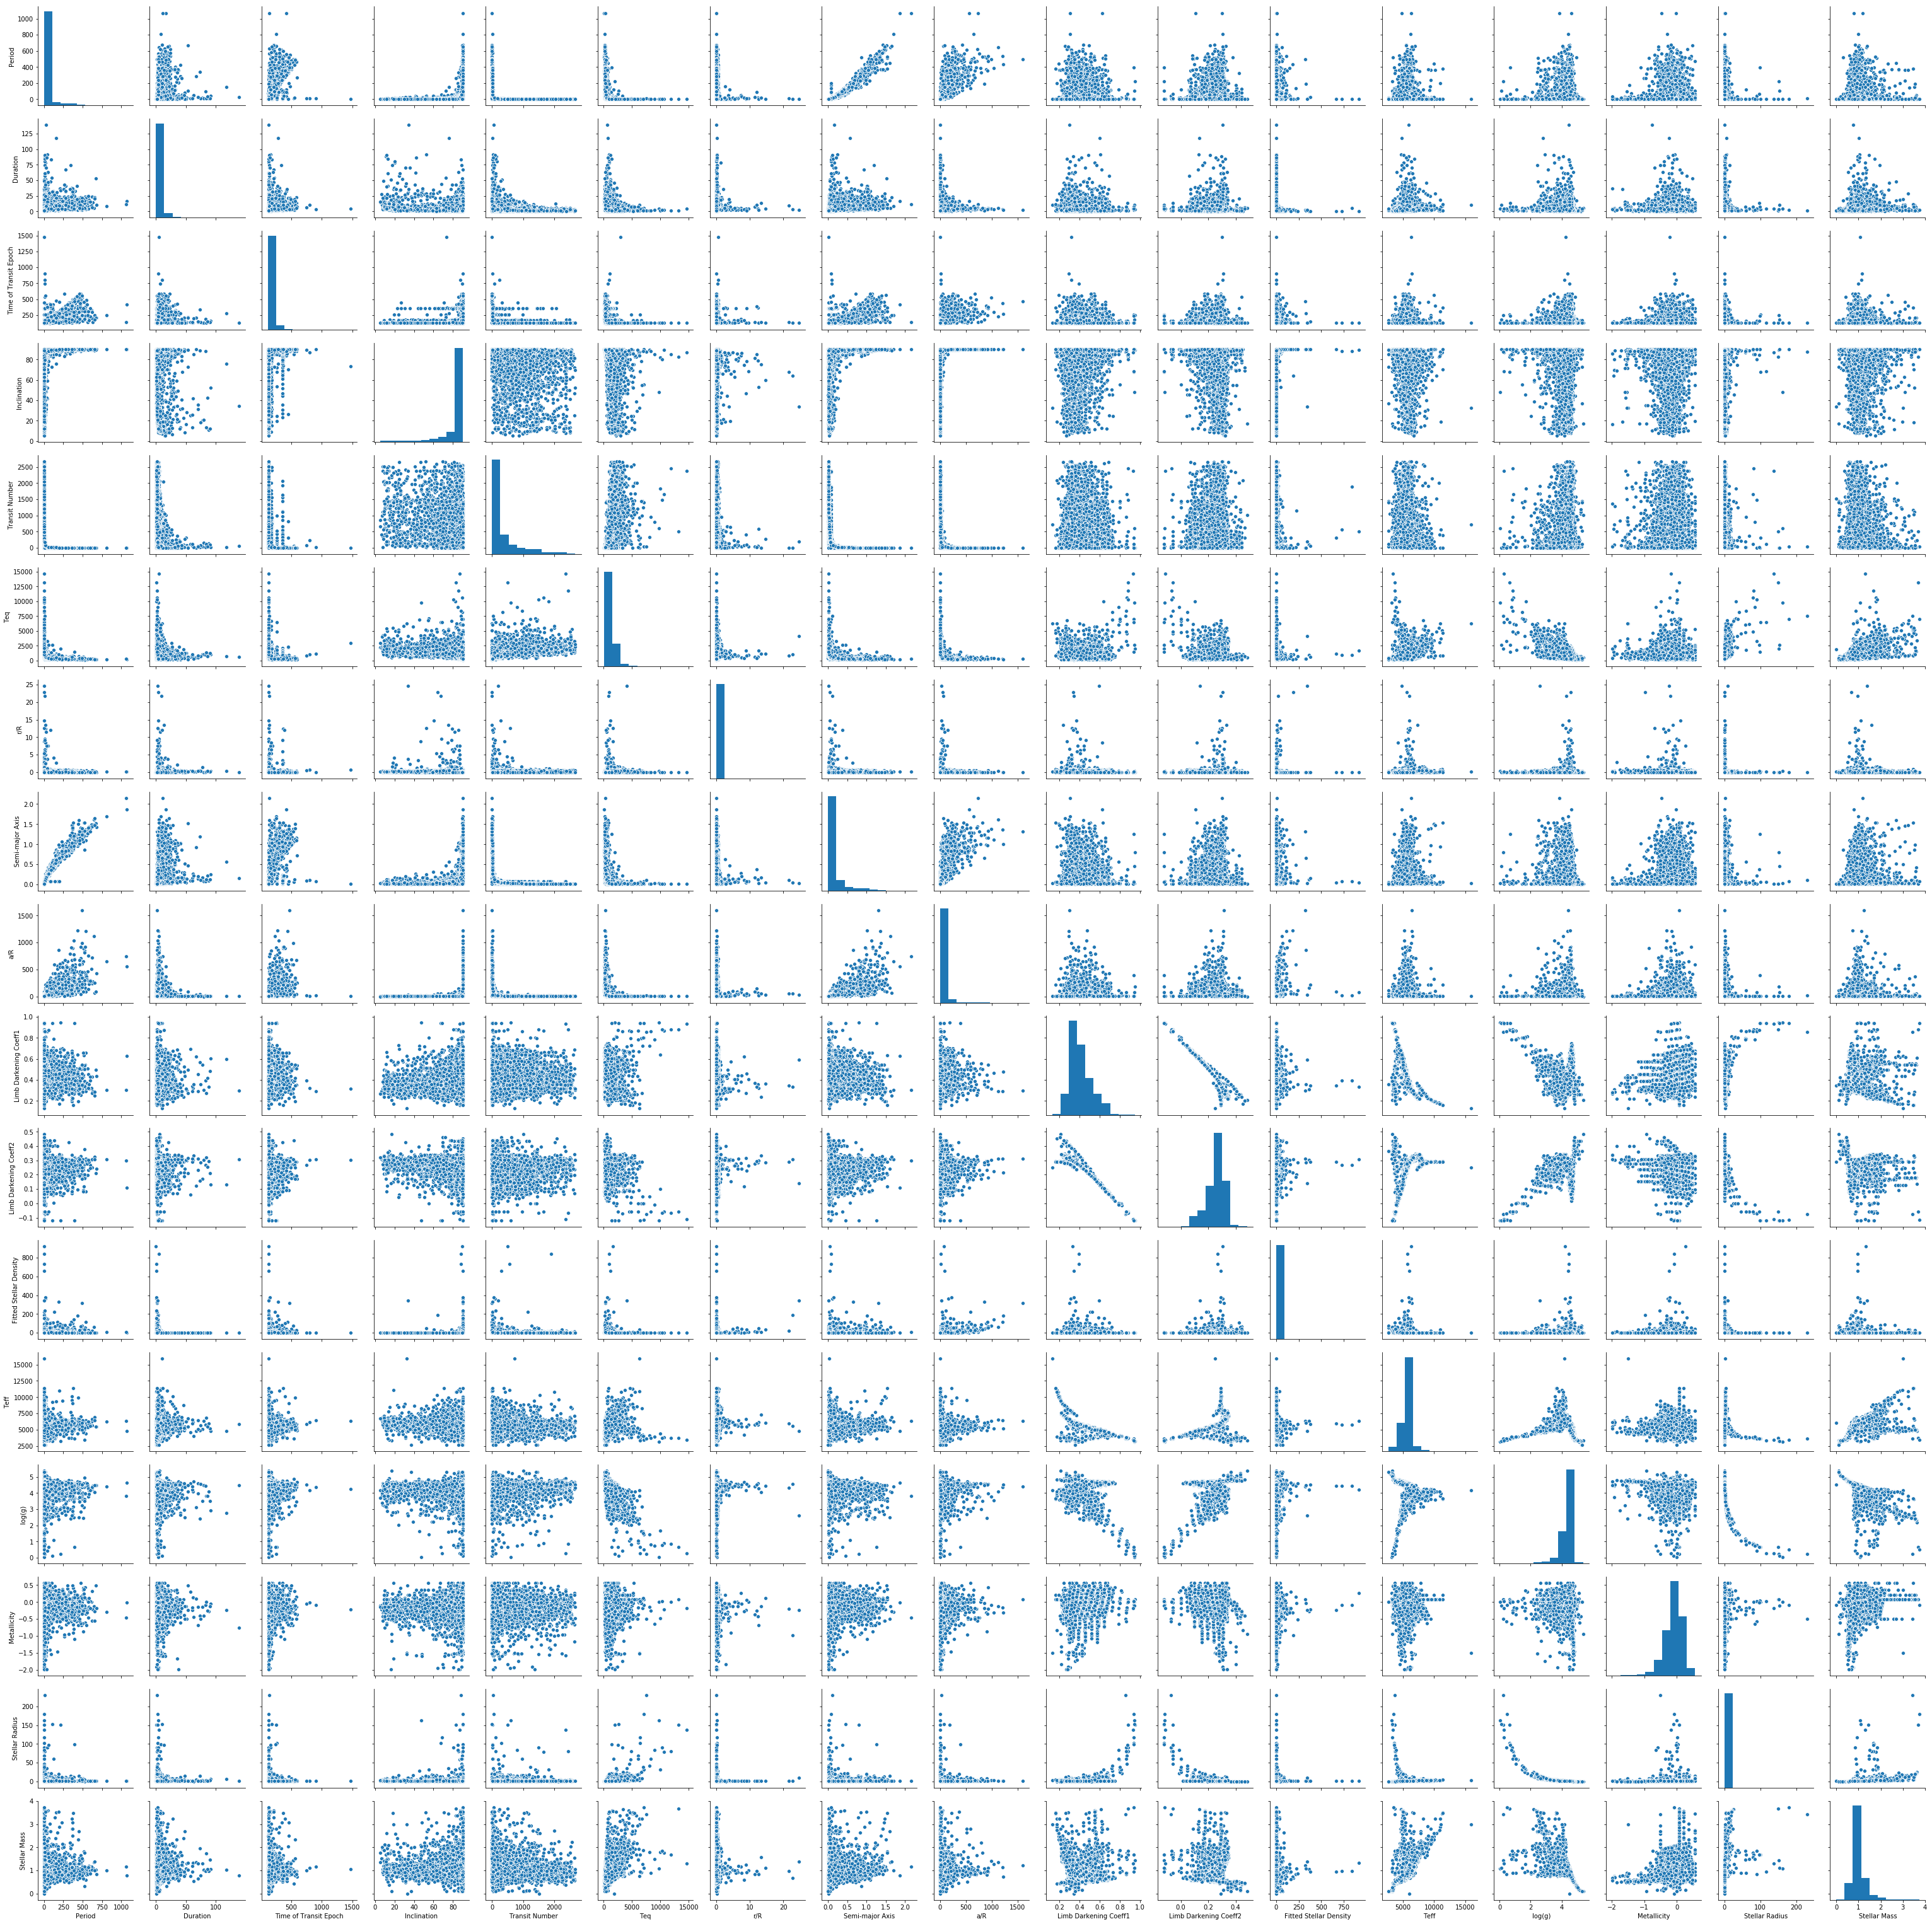

In [6]:
pp = sns.pairplot(data=df_meta_obj,
                  y_vars=df_meta_obj.columns[:],
                  x_vars=df_meta_obj.columns[:])